In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [4]:
fashion_train.head(25)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [25]:
fashion_train.shape

(60000, 785)

In [26]:
training=np.array(fashion_train,dtype="float")

In [74]:
testing=np.array(fashion_test,dtype="float")

In [75]:
print(training)
print(testing)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


4.0

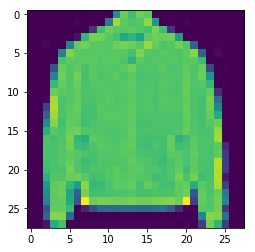

In [76]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

In [77]:
x_train=training[:,1:]/255
y_train=training[:,0]

x_test=testing[:,1:]/255
y_test=testing[:,0]

In [78]:
from sklearn.model_selection import train_test_split

x_train,x_validate,y_train,y_validate =train_test_split(x_train,y_train,test_size=0.2,random_state=12345)

In [79]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [106]:
x_train.shape

(48000, 28, 28, 1)

In [81]:
x_test.shape

(10000, 28, 28, 1)

In [82]:
x_validate.shape

(12000, 28, 28, 1)

In [83]:
import tensorflow as tf

In [84]:
import keras

In [85]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

In [86]:
cnn_model=Sequential()

In [87]:
cnn_model.add(Conv2D(32,3,3 ,input_shape=(28,28,1),activation="relu"))

/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [88]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [89]:
cnn_model.add(Flatten())

In [90]:
cnn_model.add(Dense(output_dim=32,activation="relu"))
cnn_model.add(Dense(output_dim=10,activation="sigmoid"))

/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [91]:
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])

In [92]:
epochs=8

In [93]:
cnn_model.fit(x_train,y_train,batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(x_validate,y_validate))

/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 10s 203us/step - loss: 0.9060 - acc: 0.6873 - val_loss: 0.5080 - val_acc: 0.8246
Epoch 2/8
48000/48000 [==============================] - 10s 200us/step - loss: 0.4586 - acc: 0.8429 - val_loss: 0.4333 - val_acc: 0.8547
Epoch 3/8
48000/48000 [==============================] - 11s 225us/step - loss: 0.4157 - acc: 0.8559 - val_loss: 0.3921 - val_acc: 0.8677
Epoch 4/8
48000/48000 [==============================] - 9s 195us/step - loss: 0.3834 - acc: 0.8676 - val_loss: 0.3798 - val_acc: 0.8703
Epoch 5/8
48000/48000 [==============================] - 9s 183us/step - loss: 0.3673 - acc: 0.8730 - val_loss: 0.3630 - val_acc: 0.8769
Epoch 6/8
48000/48000 [==============================] - 9s 196us/step - loss: 0.3467 - acc: 0.8791 - val_loss: 0.3750 - val_acc: 0.8675
Epoch 7/8
48000/48000 [==============================] - 8s 177us/step - loss: 0.3401 - acc: 0.8815 - val_loss: 0.3512 - val_

In [94]:
evaluation=cnn_model.evaluate(x_test,y_test)
print("Accuracy is : {:.3f} ".format(evaluation[1]))

10000/10000 [==============================] - 1s 79us/step
Accuracy is : 0.893 


In [95]:
predicted_class=cnn_model.predict_classes(x_test)

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
cm=confusion_matrix(y_test,predicted_class)

In [100]:
cm

array([[858,   1,  12,  30,   4,   1,  78,   2,  14,   0],
       [  2, 975,   2,  13,   1,   2,   5,   0,   0,   0],
       [ 10,   1, 837,   9,  72,   1,  60,   0,  10,   0],
       [ 20,   9,   9, 912,  23,   0,  25,   0,   2,   0],
       [  1,   2,  51,  21, 873,   1,  50,   0,   1,   0],
       [  0,   1,   0,   0,   0, 960,   0,  27,   2,  10],
       [151,   5,  80,  25,  77,   0, 650,   0,  12,   0],
       [  0,   0,   0,   0,   0,  20,   0, 947,   1,  32],
       [  2,   1,   5,   1,   5,   5,   6,   4, 971,   0],
       [  0,   0,   0,   0,   0,   6,   0,  41,   2, 951]])

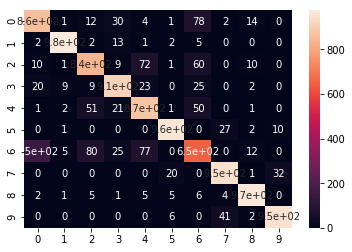

In [103]:
sns.heatmap(cm,annot=True)

In [105]:
from sklearn.metrics import classification_report

class_report=classification_report(y_test,predicted_class)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1000
         1.0       0.98      0.97      0.98      1000
         2.0       0.84      0.84      0.84      1000
         3.0       0.90      0.91      0.91      1000
         4.0       0.83      0.87      0.85      1000
         5.0       0.96      0.96      0.96      1000
         6.0       0.74      0.65      0.69      1000
         7.0       0.93      0.95      0.94      1000
         8.0       0.96      0.97      0.96      1000
         9.0       0.96      0.95      0.95      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

